In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('./NIFTY BANK-30-09-2023-to-30-09-2024.csv')


In [2]:
data.rename({'Date ':'Date'},inplace=True,axis=1)

In [3]:
data.columns

Index(['Date', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [4]:

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by date
data = data.sort_values('Date')

# Check for missing values and basic statistics
print(data.isnull().sum())
print(data.describe())










C:\Users\DELL\AppData\Local\Temp\ipykernel_21768\2419485725.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64
                                Date         Open          High   \
count                            247    247.000000    247.000000   
mean   2024-03-31 10:47:07.530364416  48113.614372  48389.438259   
min              2023-10-03 00:00:00  42555.600000  42716.200000   
25%              2024-01-01 12:00:00  46191.450000  46532.375000   
50%              2024-04-01 00:00:00  47899.350000  48154.500000   
75%              2024-07-01 12:00:00  50597.075000  50801.575000   
max              2024-09-27 00:00:00  54338.700000  54467.350000   
std                              NaN   2899.814962   2919.790570   

               Low         Close   Shares Traded   Turnover (₹ Cr)  
count    247.000000    247.000000    2.460000e+02       246.000000  
mean   47808.724899  48108.322470    2.080522e+08     10831.599715  
min    42105.400000 

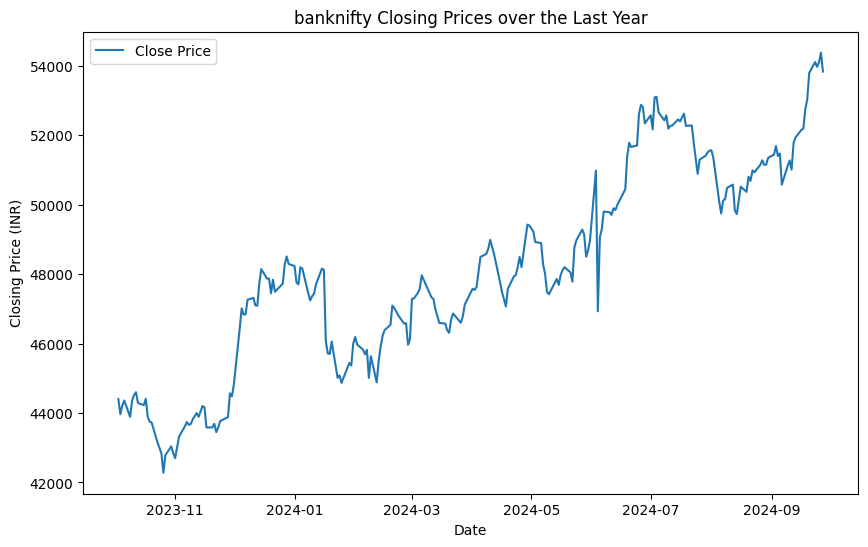

In [5]:
# EDA
# Plotting closing price over time
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close '], label='Close Price')
plt.title('banknifty Closing Prices over the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

In [6]:
# Plotting distribution of closing prices
plt.figure(figsize=(8,6))
sns.histplot(data['Close '], kde=True)
plt.title('Distribution of banknifty Closing Prices')
plt.xlabel('Closing Price (INR)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Create a time variable (number of days since the start)
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Define independent (X) and dependent (y) variables
X = data[['Days']]
y = data['Close ']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the closing price using the model
data['Predicted'] = model.predict(X)

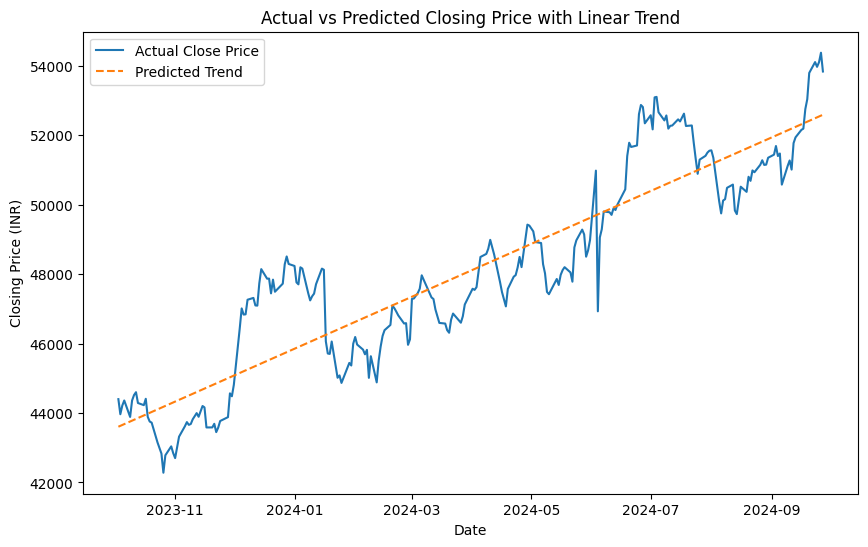

In [24]:
# Plot actual vs predicted closing prices
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Close '], label='Actual Close Price')
plt.plot(data['Date'], data['Predicted'], label='Predicted Trend', linestyle='--')
plt.title('Actual vs Predicted Closing Price with Linear Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

In [25]:

# Evaluating the linear regression model
mse = mean_squared_error(y, data['Predicted'])
r2 = r2_score(y, data['Predicted'])

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



Mean Squared Error (MSE): 1543606.6448187986
R-squared (R2): 0.8176971391858572


# Conclusion
# EDA Results:
1.Price Trends: The closing prices of BankNifty are plotted over time, revealing the overall price movements for the index over the past year.
2.Distribution: A histogram shows the distribution of closing prices, providing insights into the range and spread of values throughout the year.
# Linear Regression Results:

1.Model Fitting: A linear regression model was applied using the number of days as the independent variable and the closing price as the dependent variable.
2.Trend Visualization: The plot of actual vs. predicted closing prices shows the predicted linear trend alongside the real values, indicating the general direction of the stock (upward or downward).

# Model Performance:
1. R-squared (R²): The R² value of 0.818 shows that the model explains about 81.8% of the variance in the data, indicating a good fit.
2. Mean Squared Error (MSE): The MSE value of 1,543,606.64 suggests the average squared difference between predicted and actual prices. A lower MSE is desirable.